## **Including Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Cleaned Temperature by City

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [3]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [5]:
df.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [6]:
#In order to work with date and time we need to convert the string date time to standard format provided by pandas
df['dt']=pd.to_datetime(df['dt'])
#extracting info for visualizations (e.g. temp vs year)
df['Month'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day
df['Weekday'] = df['dt'].dt.weekday  # Monday is 0 and Sunday is 6
df['Year'] = df['dt'].dt.year

In [7]:
df.sample(10, random_state=10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Day,Weekday,Year
4086062,1864-12-01,25.000,1.346,La Rioja,Argentina,29.74S,66.46W,12,1,3,1864
5443469,1988-01-01,-3.278,0.308,Olathe,United States,39.38N,95.72W,1,1,4,1988
4590929,1977-07-01,15.171,0.298,Manchester,United Kingdom,53.84N,1.36W,7,1,4,1977
1436430,1963-06-01,29.842,0.294,Chandannagar,India,23.31N,88.25E,6,1,5,1963
5712484,1849-02-01,NaN,NaN,Parung,Indonesia,5.63S,106.55E,2,1,3,1849
2520199,1757-03-01,2.057,4.346,Gdynia,Poland,53.84N,17.73E,3,1,1,1757
2471681,1980-12-01,20.552,0.726,Gandhinagar,India,23.31N,72.52E,12,1,0,1980
8452250,1921-02-01,16.027,0.347,Yungho,Taiwan,24.92N,122.36E,2,1,1,1921
2825303,1891-12-01,3.325,0.754,Halifax,Canada,44.20N,62.61W,12,1,1,1891
4491111,1891-01-01,18.363,0.685,Madhyamgram,India,23.31N,88.25E,1,1,3,1891


In [8]:
# Calculate the percentage of null values for the specified columns
selected_columns = ['AverageTemperature', 'AverageTemperatureUncertainty']
null_percentage = df[selected_columns].isnull().mean() * 100
print("Percentage of Null Values:")
print(null_percentage)

Percentage of Null Values:
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
dtype: float64


In [9]:
df = df.dropna()             # drop null values 
df = df.reset_index(drop=True)    # reset indexes
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Day,Weekday,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,11,1,4,1743
1,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,4,1,2,1744
2,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,5,1,4,1744
3,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,6,1,0,1744
4,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,7,1,2,1744
...,...,...,...,...,...,...,...,...,...,...,...
8235077,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,4,1,0,2013
8235078,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,5,1,2,2013
8235079,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,6,1,5,2013
8235080,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,7,1,0,2013


In [10]:
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Month                            0
Day                              0
Weekday                          0
Year                             0
dtype: int64

In [11]:
pd.DataFrame(df['City'].unique())

,0
0,Århus
1,Çorlu
2,Çorum
3,Öskemen
4,Ürümqi
...,...
3443,Zouxian
3444,Zunyi
3445,Zurich
3446,Zuwarah


In [12]:
pd.DataFrame(df['Country'].unique())

,0
0,Denmark
1,Turkey
2,Kazakhstan
3,China
4,Spain
...,...
154,Estonia
155,Georgia
156,Mongolia
157,Laos


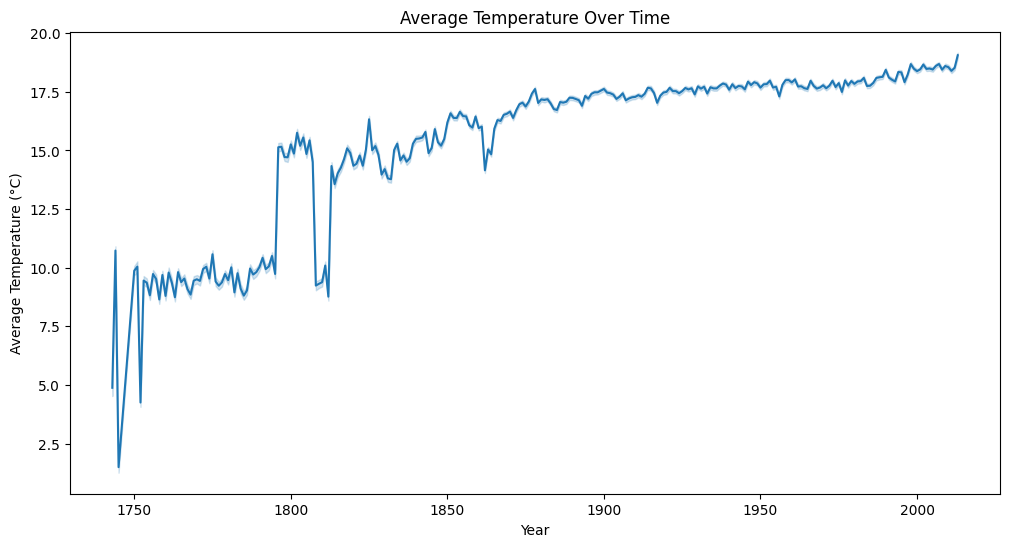

In [13]:
# Time Series Plot for Average Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='AverageTemperature', data=df)
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_8964\1255266847.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15)


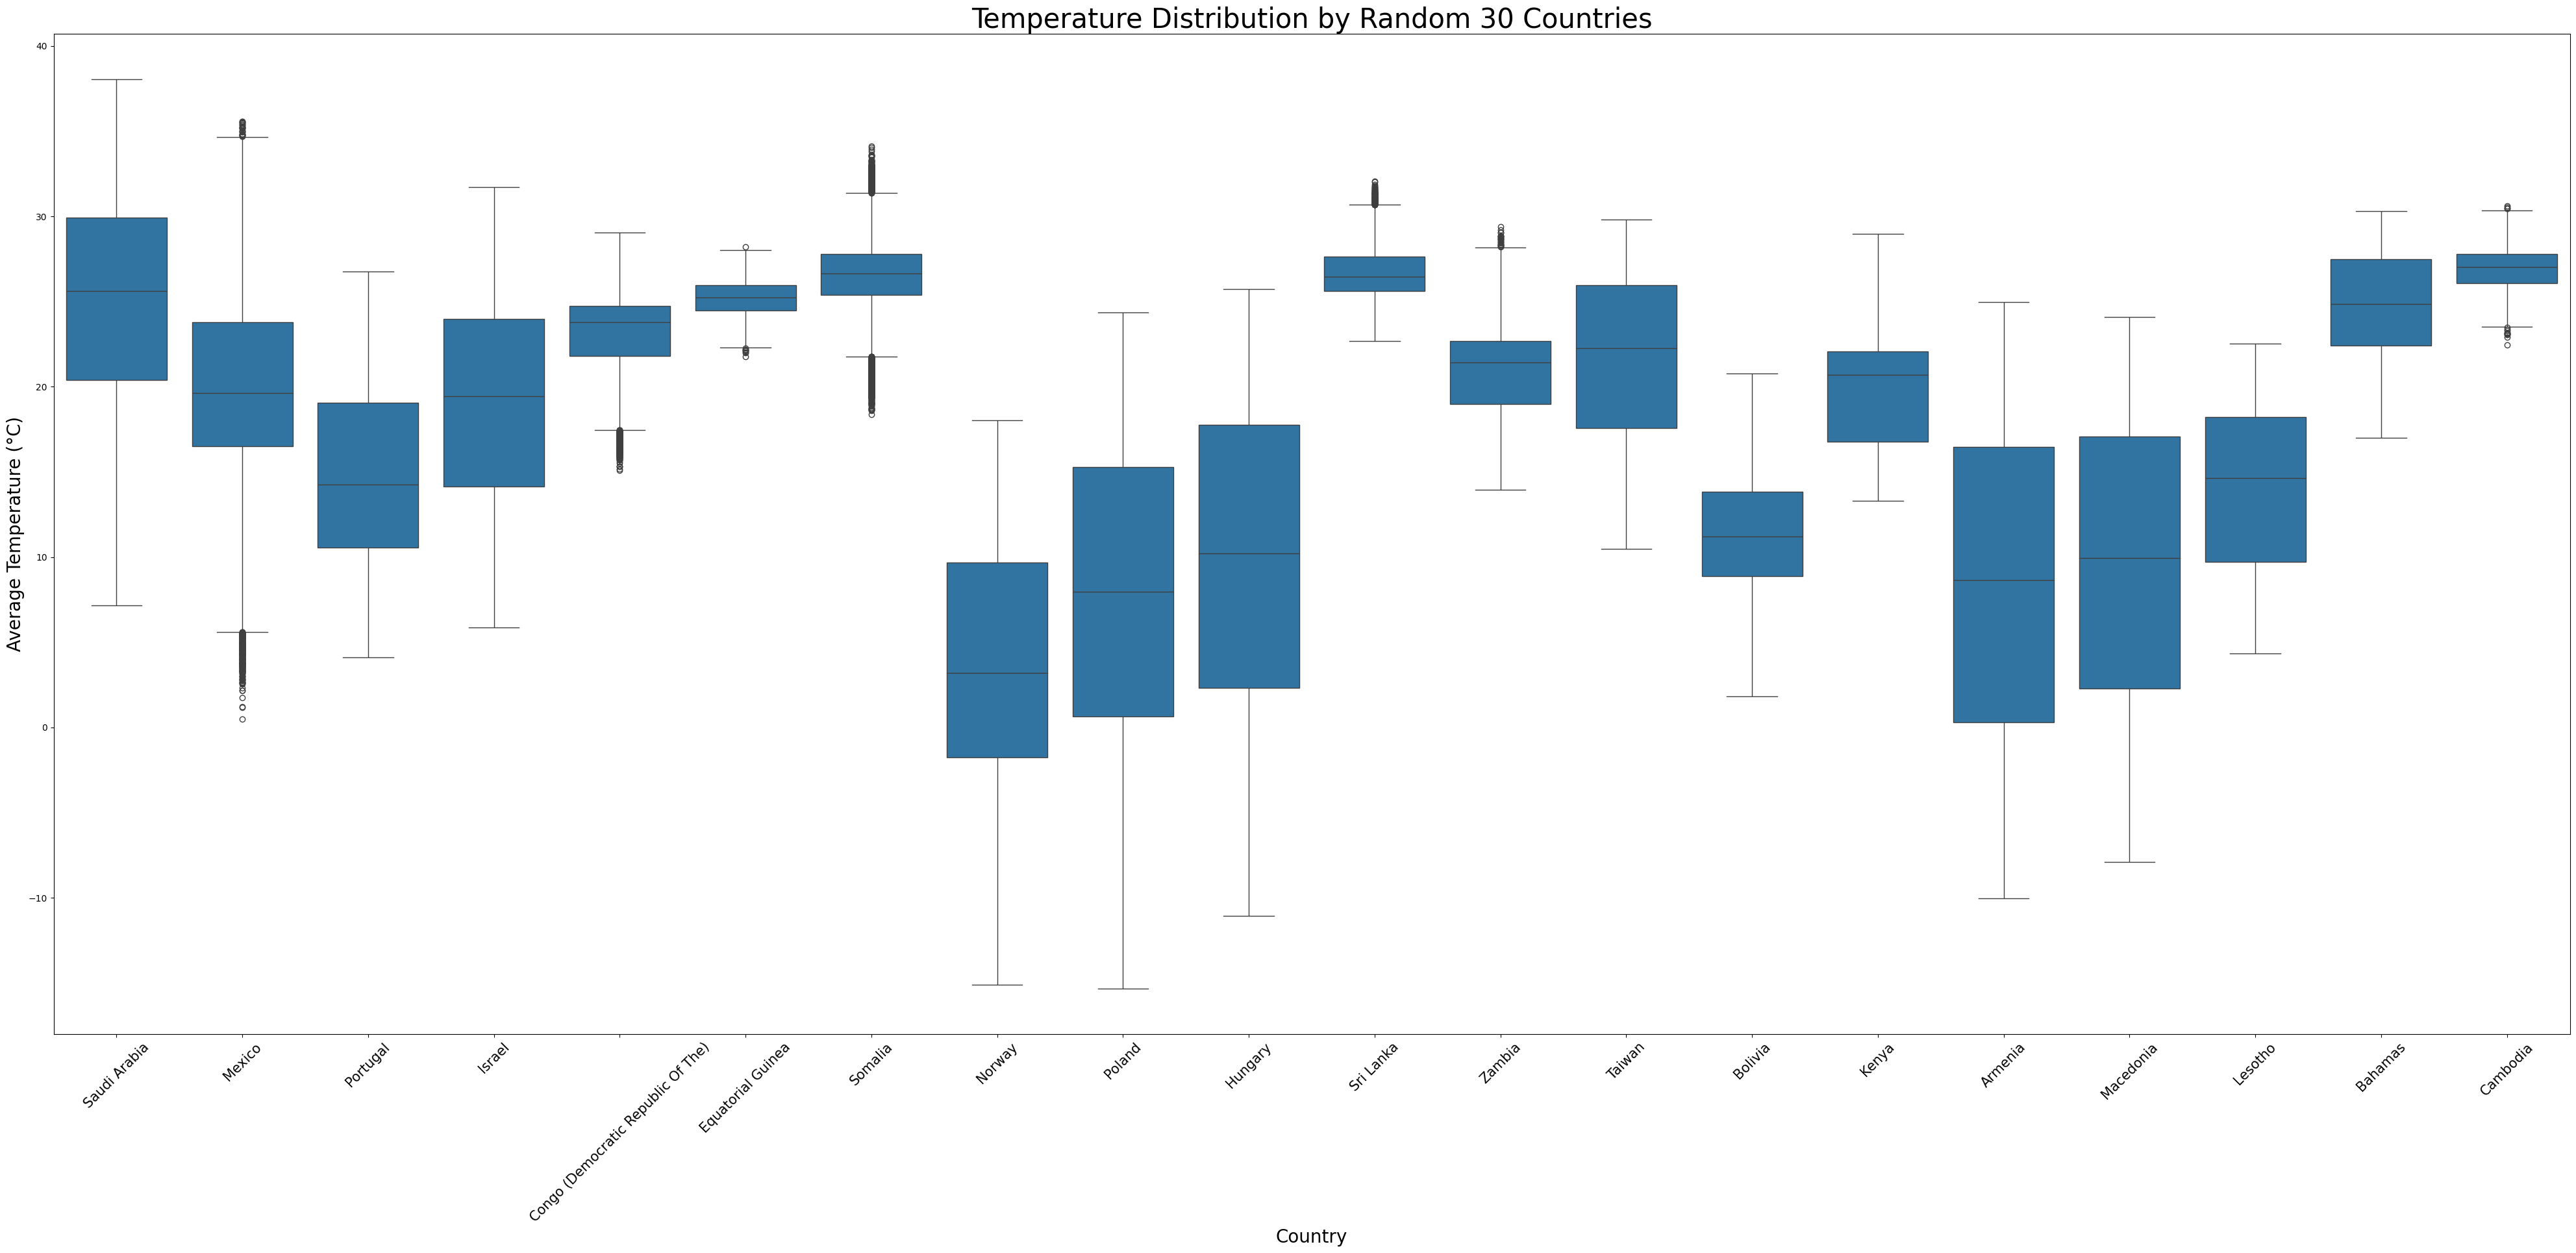

In [14]:
#  Distribution of Temperature by Country
random_countries = random.sample(df['Country'].unique().tolist(), 20)
plt.figure(figsize=(50, 20))
ax = sns.boxplot(x='Country', y='AverageTemperature', data=df[df['Country'].isin(random_countries)])
ax.set_title('Temperature Distribution by Random 30 Countries', fontsize=30)
ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Average Temperature (°C)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15)

plt.show()


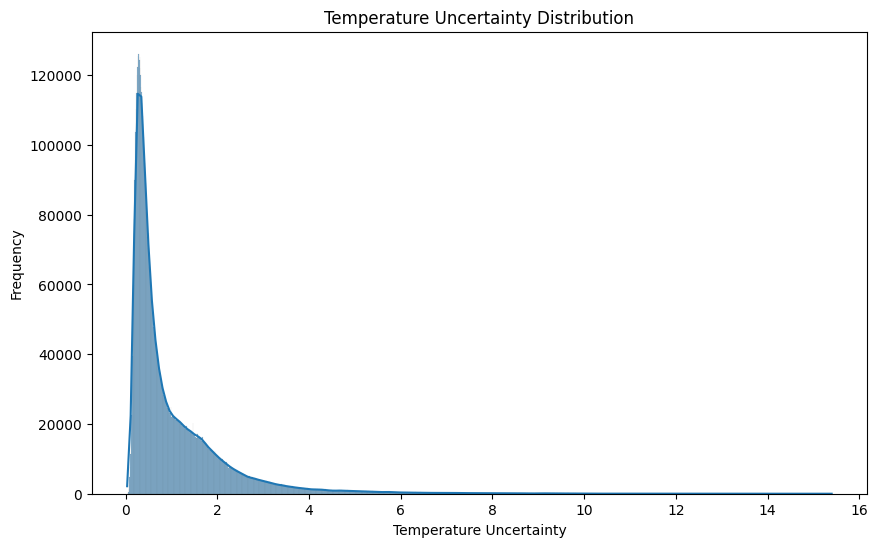

In [15]:
#  Temperature Uncertainty Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperatureUncertainty'].dropna(), kde=True)
plt.title('Temperature Uncertainty Distribution')
plt.xlabel('Temperature Uncertainty')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['City'].value_counts()[:6]  # top 6 cities

City
Springfield    9147
Worcester      8158
León           7298
Rongcheng      6385
Brest          6332
London         6307
Name: count, dtype: int64

In [17]:
df=df.drop(['Latitude','Longitude', 'dt'],axis=1)
df

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Month,Day,Weekday,Year
0,6.068,1.737,Århus,Denmark,11,1,4,1743
1,5.788,3.624,Århus,Denmark,4,1,2,1744
2,10.644,1.283,Århus,Denmark,5,1,4,1744
3,14.051,1.347,Århus,Denmark,6,1,0,1744
4,16.082,1.396,Århus,Denmark,7,1,2,1744
...,...,...,...,...,...,...,...,...
8235077,7.710,0.182,Zwolle,Netherlands,4,1,0,2013
8235078,11.464,0.236,Zwolle,Netherlands,5,1,2,2013
8235079,15.043,0.261,Zwolle,Netherlands,6,1,5,2013
8235080,18.775,0.193,Zwolle,Netherlands,7,1,0,2013


In [18]:
df.to_csv('Cleaned_GlobalLandTemperaturesByCity.csv', index=False)

# Cleaning Tmeperature by Country

In [19]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [20]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [22]:
df.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [23]:
#In order to work with date and time we need to convert the string date time to standard format provided by pandas
df['dt']=pd.to_datetime(df['dt'])
#extracting info for visualizations (e.g. temp vs year)
df['Month'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day
df['Weekday'] = df['dt'].dt.weekday  # Monday is 0 and Sunday is 6
df['Year'] = df['dt'].dt.year
df=df.drop(['dt'],axis=1)

In [24]:
df.sample(10, random_state=10)

,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Day,Weekday,Year
325748,14.243,3.730,Malta,4,1,6,1764
378023,30.445,1.285,Niger,7,1,2,1936
437094,NaN,NaN,Saint Kitts And Nevis,1,1,6,1837
416703,12.467,0.155,Poland,9,1,4,2000
116402,25.456,0.312,Colombia,3,1,4,1963
406549,23.832,0.415,Papua New Guinea,5,1,4,1925
390112,-6.940,3.120,Norway,12,1,5,1838
216046,24.958,0.374,Guadeloupe,2,1,2,1956
352082,1.919,0.409,Montenegro,2,1,5,1969
237420,9.776,4.911,Hungary,10,1,2,1760


In [25]:
# Calculate the percentage of null values for the specified columns
selected_columns = ['AverageTemperature', 'AverageTemperatureUncertainty']
null_percentage = df[selected_columns].isnull().mean() * 100
print("Percentage of Null Values:")
print(null_percentage)

Percentage of Null Values:
AverageTemperature               5.654225
AverageTemperatureUncertainty    5.526251
dtype: float64


In [26]:
df = df.dropna()             # drop null values 
df = df.reset_index(drop=True)    # reset indexes
df

,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Day,Weekday,Year
0,4.384,2.294,Åland,11,1,4,1743
1,1.530,4.680,Åland,4,1,2,1744
2,6.702,1.789,Åland,5,1,4,1744
3,11.609,1.577,Åland,6,1,0,1744
4,15.342,1.410,Åland,7,1,2,1744
...,...,...,...,...,...,...,...
544806,21.142,0.495,Zimbabwe,4,1,0,2013
544807,19.059,1.022,Zimbabwe,5,1,2,2013
544808,17.613,0.473,Zimbabwe,6,1,5,2013
544809,17.000,0.453,Zimbabwe,7,1,0,2013


In [27]:
df.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
Month                            0
Day                              0
Weekday                          0
Year                             0
dtype: int64

In [28]:
pd.DataFrame(df['Country'].unique())

,0
0,Åland
1,Afghanistan
2,Africa
3,Albania
4,Algeria
...,...
237,Virgin Islands
238,Western Sahara
239,Yemen
240,Zambia


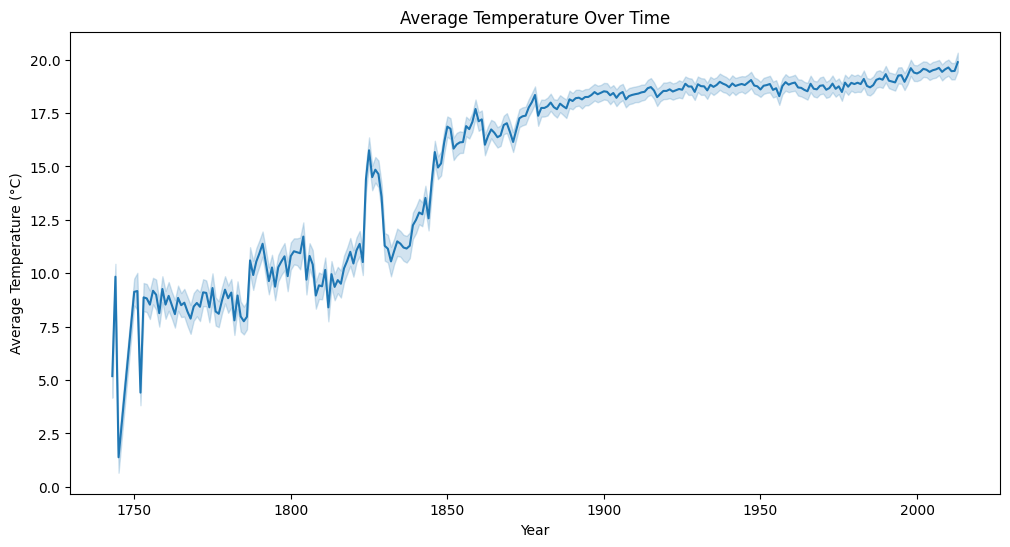

In [29]:
# Time Series Plot for Average Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='AverageTemperature', data=df)
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_8964\3191978762.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=20)


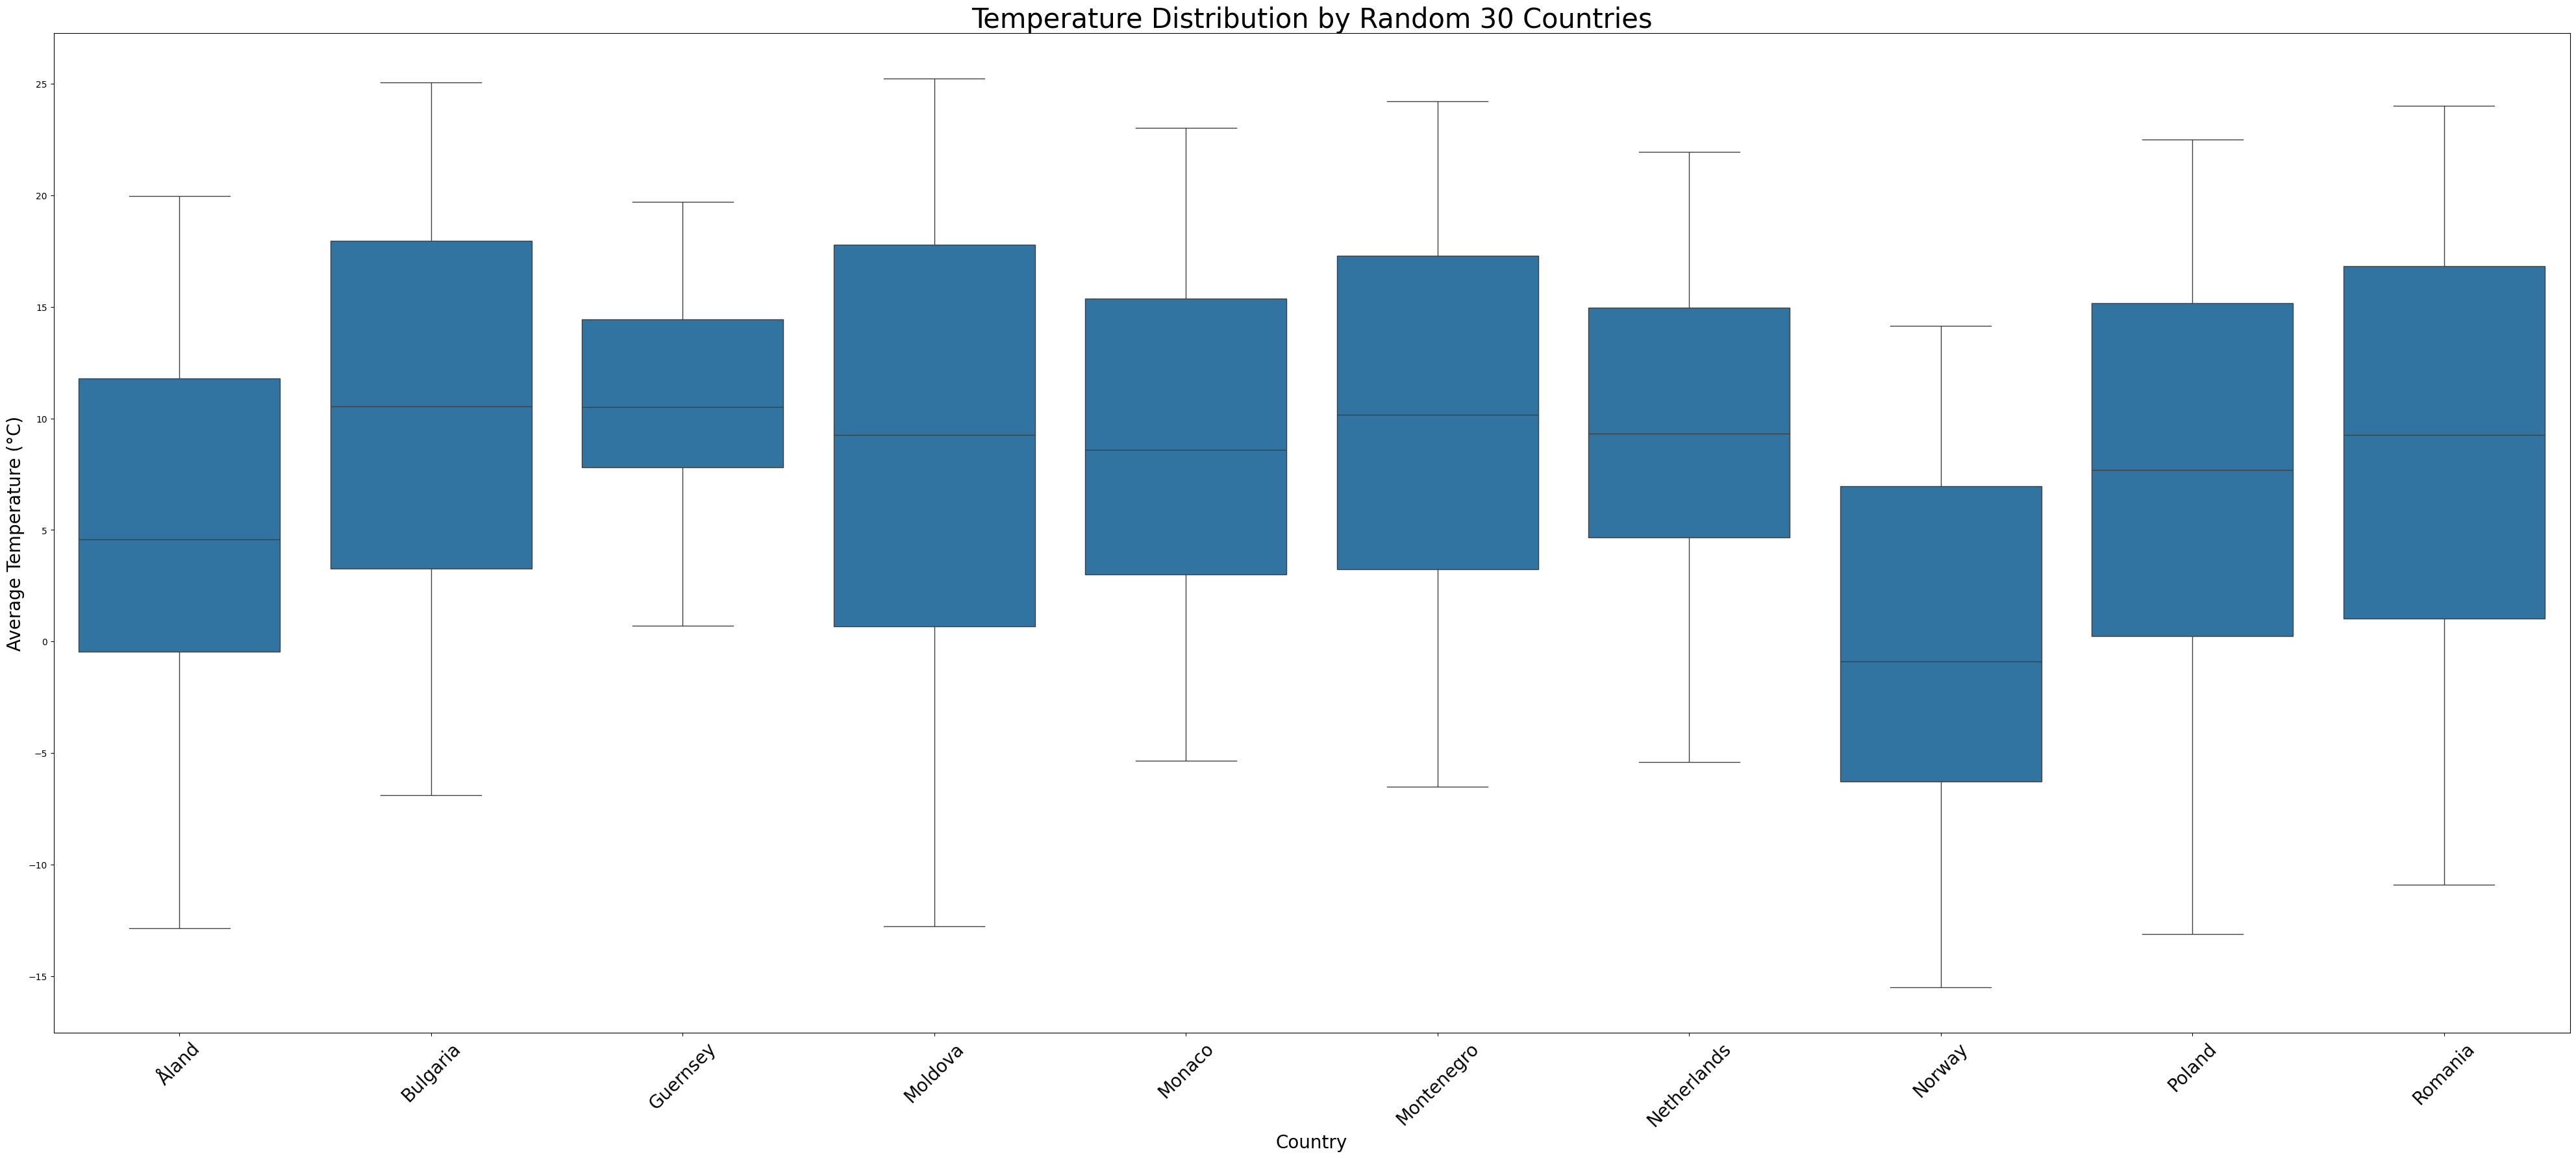

In [30]:
#  Distribution of Temperature by Country
#top_countries = random.sample(df['Country'].unique().tolist(), 20)
top_countries = df['Country'].value_counts()[:10].index.tolist()
plt.figure(figsize=(50, 20))
ax = sns.boxplot(x='Country', y='AverageTemperature', data=df[df['Country'].isin(top_countries)])
ax.set_title('Temperature Distribution by Random 30 Countries', fontsize=30)
ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Average Temperature (°C)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=20)

plt.show()


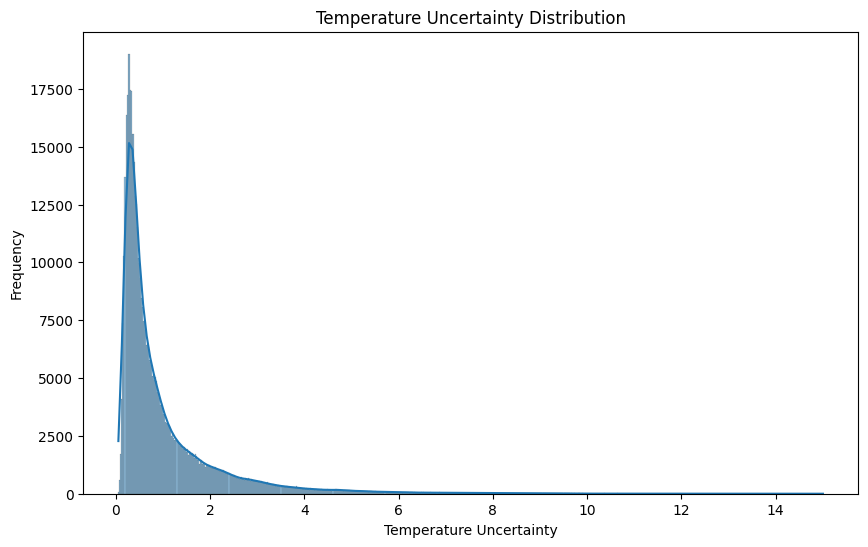

In [31]:
#  Temperature Uncertainty Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperatureUncertainty'].dropna(), kde=True)
plt.title('Temperature Uncertainty Distribution')
plt.xlabel('Temperature Uncertainty')
plt.ylabel('Frequency')
plt.show()

In [32]:
df

,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Day,Weekday,Year
0,4.384,2.294,Åland,11,1,4,1743
1,1.530,4.680,Åland,4,1,2,1744
2,6.702,1.789,Åland,5,1,4,1744
3,11.609,1.577,Åland,6,1,0,1744
4,15.342,1.410,Åland,7,1,2,1744
...,...,...,...,...,...,...,...
544806,21.142,0.495,Zimbabwe,4,1,0,2013
544807,19.059,1.022,Zimbabwe,5,1,2,2013
544808,17.613,0.473,Zimbabwe,6,1,5,2013
544809,17.000,0.453,Zimbabwe,7,1,0,2013


In [33]:
df.to_csv('Cleaned_GlobalLandTemperaturesByCountry.csv', index=False)

# Cleaned Temperature By Major City

In [34]:
#import dataset
df=pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [35]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [36]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [37]:
df['City'].unique()


array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [38]:
df['Country'].unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [40]:
df.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [41]:
df['dt']=pd.to_datetime(df['dt'])

In [42]:
df['Month'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day
df['Weekday'] = df['dt'].dt.weekday  # Monday is 0 and Sunday is 6
df['Year'] = df['dt'].dt.year

## **Visualization and Understanding Data**

In [43]:
city_data = df.drop_duplicates(['City'])

In [44]:
LAT = []
LONG = []

geolocator = Nominatim(user_agent="YourApp/1.0")

for city in city_data.City.tolist():
    location = geolocator.geocode(city)
    if location is not None:
        LAT.append(location.latitude)
        LONG.append(location.longitude)
    else:
        LAT.append(None)
        LONG.append(None)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Fortaleza&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000218665EF050>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [45]:
def clean_coordinate(coord):
    # Remove non-numeric characters
    cleaned_coord = ''.join(char for char in coord if char.isdigit() or char in ['.', '-'])
    return float(cleaned_coord) if cleaned_coord else None

world_map = folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
    lat = city_data.iloc[i]['Latitude']
    long = city_data.iloc[i]['Longitude']

    # Clean latitude and longitude values
    cleaned_lat = clean_coordinate(lat)
    cleaned_long = clean_coordinate(long)

    # Check if both latitude and longitude are numeric
    if pd.notnull(cleaned_lat) and pd.notnull(cleaned_long):
        radius = 5
        folium.CircleMarker(location=[cleaned_lat, cleaned_long], radius=radius, fill=True, color='darkred', fill_color='darkred').add_to(marker_cluster)

In [46]:
world_map.save("city_map.html")

In [47]:
IFrame(src='city_map.html', width=700, height=600)

## **Handle Null values**

In [48]:
df_null=df[df['AverageTemperature'].isna()]

In [49]:
df_null=df_null.sort_values(by='dt')

In [50]:
df_null['City'].value_counts()

City
Jakarta          386
Surabaya         386
Dar Es Salaam    379
Fortaleza        366
Karachi          289
                ... 
Santiago           1
Seoul              1
Shanghai           1
Nanjing            1
Wuhan              1
Name: count, Length: 98, dtype: int64

In [51]:
df_count=pd.DataFrame(df_null['Year'].value_counts())

In [52]:
df_count.sort_values(by='count',ascending=False)

,count
Year,
1863,375
1862,374
1864,300
1865,262
1867,248
...,...
1898,2
1776,1
1758,1


In [53]:
df_count.sort_index()

,count
Year,
1743,13
1744,52
1745,104
1746,156
1747,156
...,...
1888,24
1889,12
1890,13


In [54]:
len(df['Year'].unique()),len(df_null['Year'].unique())

(271, 141)

In [55]:
271-141

130

In [56]:
(len(df_null)/len(df))*100

4.599940629742826

### **No specific pattern found in Null values**
**There are just 4.6% null values it would be appropraite to drop them**

In [57]:
df=df.dropna()

In [58]:
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Month                            0
Day                              0
Weekday                          0
Year                             0
dtype: int64

In [59]:
df = df.reset_index(drop=True)

In [60]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Day,Weekday,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,1,0,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,2,1,3,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,3,1,3,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,4,1,6,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,5,1,1,1849


## **let's pick some major cities to look into**

In [61]:
df['City'].value_counts()[:10]

City
Madrid              3166
Berlin              3166
London              3166
Saint Petersburg    3166
Rome                3166
Moscow              3166
Kiev                3166
Paris               3166
Istanbul            3166
Toronto             3141
Name: count, dtype: int64

In [62]:
Cities=['Madrid','Berlin','London','Saint Petersburg','Rome','Moscow']

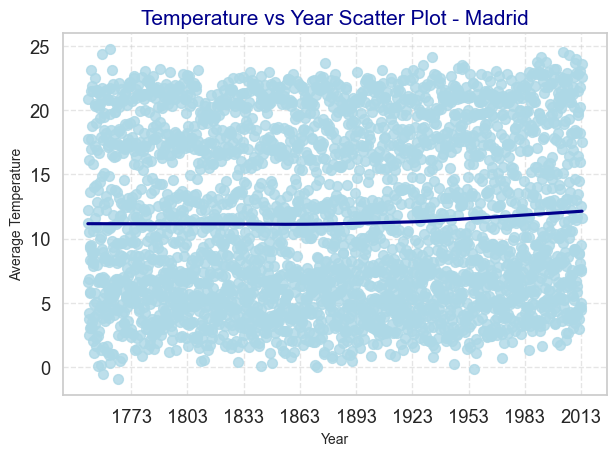

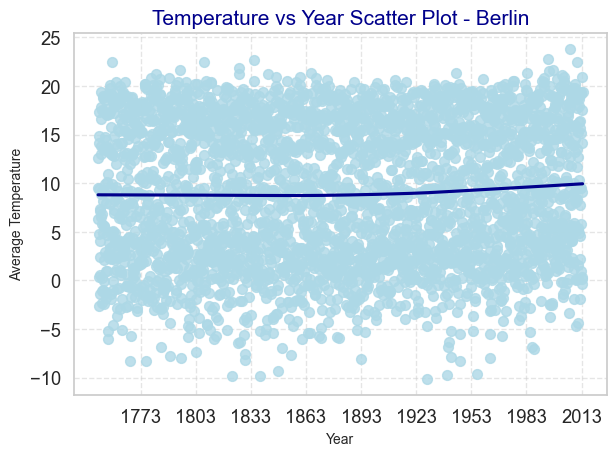

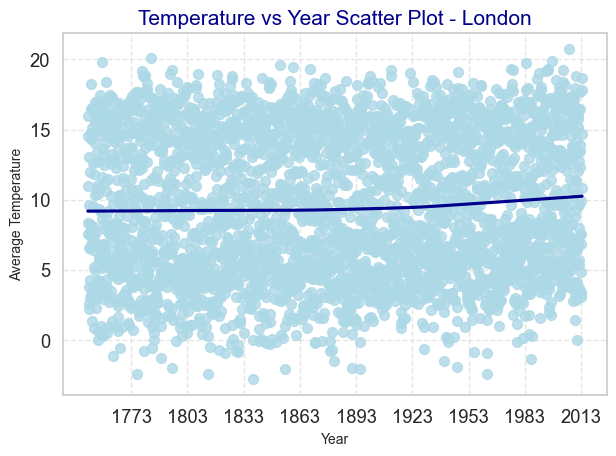

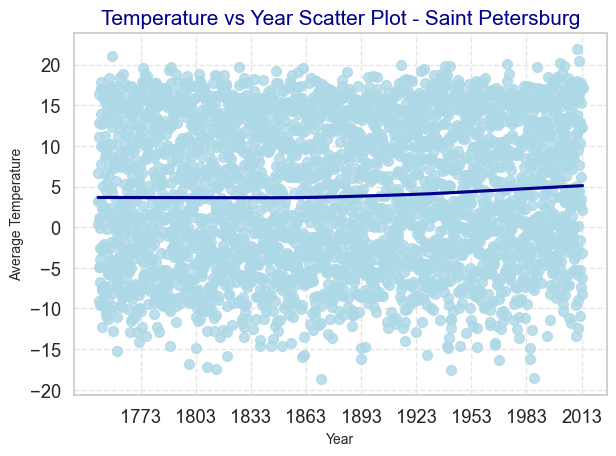

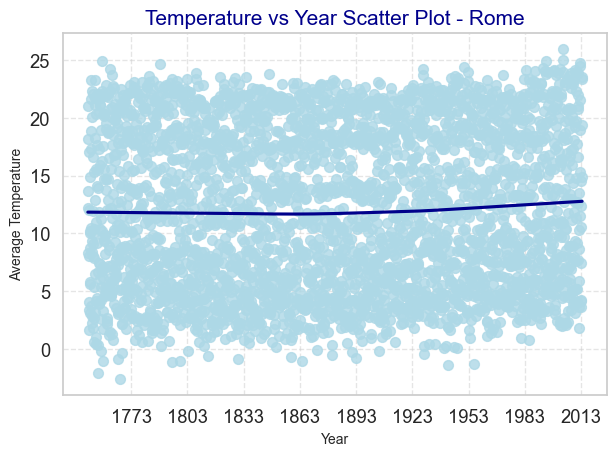

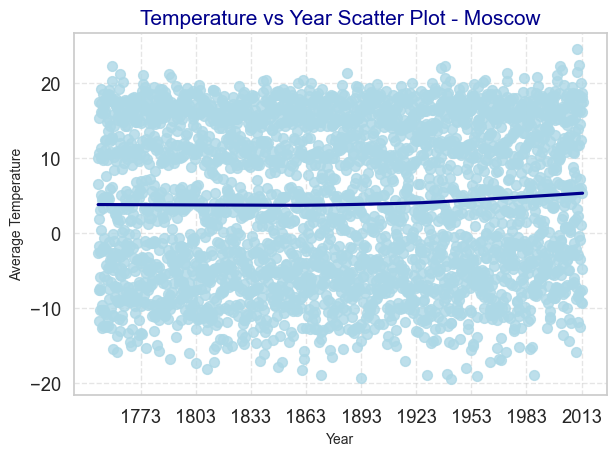

In [63]:
sns.set_palette("viridis")
sns.set(style="whitegrid", font_scale=1.2)

for c in Cities:
    city_df = df[df['City'] == c]
    city_df = city_df.reset_index(drop=True)
    city_df.dt = pd.to_datetime(city_df.dt)
    
    change_year_index = []
    change_year = []
    
    
    for y in range(0, len(city_df['Year']) - 1):
        if city_df['Year'].iloc[y] != city_df['Year'].iloc[y + 1]:
            change_year.append(city_df['Year'].iloc[y + 1])
            change_year_index.append(y + 1)

    x_ticks_year_list = np.linspace(min(city_df['Year']), max(city_df['Year']), 10).astype(int)
    change_year_index = np.array(change_year_index)
    
    
    x_ticks_year_index = [
        change_year_index[np.where(np.array(change_year) == year)[0][0]] for year in x_ticks_year_list[1:]
    ]
    
    
    sns.regplot(x=city_df.index, y=city_df['AverageTemperature'], scatter_kws={'s': 50, 'color': 'lightblue'},
                lowess=True, line_kws={'color': 'darkblue'})
    
    
    plt.xticks(ticks=x_ticks_year_index, labels=x_ticks_year_list[1:])
    
    
    plt.title(f'Temperature vs Year Scatter Plot - {c}', color='darkblue', fontsize=15)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Average Temperature', fontsize=10)
    
   
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    
    plt.show()


**We have a multivalued problem where we need to pass city and country to model as well hence we can't use ARIMA**

**we will try Xgboost, catboost etc.still let's see Is our data stationary.**

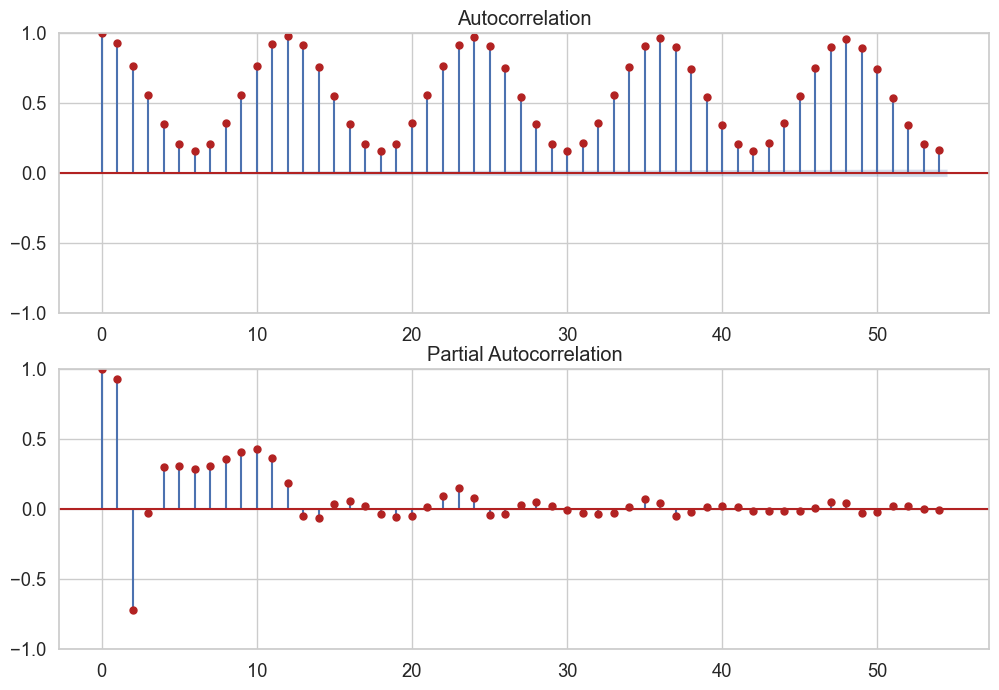

In [64]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.AverageTemperature, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.AverageTemperature, ax=ax2,color='firebrick')

## This suggests that our data is stationary, Let's check this using adfuller 

In [65]:
def adf_test(time_series):
    result = adfuller(time_series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])


time_series_data = df['AverageTemperature']


adf_test(time_series_data)

ADF Statistic: -6.346503375498158
p-value: 2.674848271467812e-08
Critical Values: {'1%': -3.4303786700202767, '5%': -2.8615526717782096, '10%': -2.5667767447304595}


**p-value is less than a significance level (commonly 0.05), you can reject the null hypothesis of non-stationarity. Lower p-values indicate stronger evidence against the null hypothesis.**


In [66]:
city_one=df[df['City']=='Chicago']

In [67]:
city_one.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Day,Weekday,Year
49197,1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W,11,1,4,1743
49198,1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W,4,1,2,1744
49199,1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W,5,1,4,1744
49200,1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W,6,1,0,1744
49201,1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W,7,1,2,1744


In [68]:
city_one['Latitude'].value_counts()

Latitude
42.59N    3141
Name: count, dtype: int64

In [69]:
city_one['Longitude'].value_counts()

Longitude
87.27W    3141
Name: count, dtype: int64

# **As we will be using City and Country as a label hence we will drop Longitude and Latitude columns**

In [70]:
df=df.drop(['Latitude','Longitude'],axis=1)

In [71]:
#lets save the cleaned data
df.to_csv('cleaned_temp_data.csv',index=False)

# Cleaned Temperture By State

In [72]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [73]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [75]:
df.isna().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [76]:
#In order to work with date and time we need to convert the string date time to standard format provided by pandas
df['dt']=pd.to_datetime(df['dt'])
#extracting info for visualizations (e.g. temp vs year)
df['Month'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day
df['Weekday'] = df['dt'].dt.weekday  # Monday is 0 and Sunday is 6
df['Year'] = df['dt'].dt.year
df=df.drop(['dt'],axis=1)

In [77]:
df.sample(10, random_state=10)

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Month,Day,Weekday,Year
181880,25.865,0.254,Iowa,United States,8,1,5,1936
469627,23.529,0.773,Rio De Janeiro,Brazil,12,1,5,1900
249341,18.055,0.245,Komi Permyak,Russia,7,1,4,1910
505424,14.204,0.495,Shandong,China,10,1,2,1924
158388,17.917,0.358,Heilongjiang,China,8,1,0,1932
368046,8.707,0.181,New Jersey,United States,4,1,3,1982
332426,15.407,0.185,Montana,United States,6,1,2,1994
350245,-8.865,0.192,Nebraska,United States,1,1,1,1957
446460,-17.706,0.936,Primor'Ye,Russia,12,1,4,1950
79921,-5.205,0.521,Chelyabinsk,Russia,3,1,2,1922


In [78]:
# Calculate the percentage of null values for the specified columns
selected_columns = ['AverageTemperature', 'AverageTemperatureUncertainty']
null_percentage = df[selected_columns].isnull().mean() * 100
print("Percentage of Null Values:")
print(null_percentage)

Percentage of Null Values:
AverageTemperature               3.972277
AverageTemperatureUncertainty    3.972277
dtype: float64


In [79]:
df = df.dropna()             # drop null values 
df = df.reset_index(drop=True)    # reset indexes
df

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Month,Day,Weekday,Year
0,25.544,1.171,Acre,Brazil,5,1,1,1855
1,24.228,1.103,Acre,Brazil,6,1,4,1855
2,24.371,1.044,Acre,Brazil,7,1,6,1855
3,25.427,1.073,Acre,Brazil,8,1,2,1855
4,25.675,1.014,Acre,Brazil,9,1,5,1855
...,...,...,...,...,...,...,...,...
620022,15.710,0.461,Zhejiang,China,4,1,0,2013
620023,21.634,0.578,Zhejiang,China,5,1,2,2013
620024,24.679,0.596,Zhejiang,China,6,1,5,2013
620025,29.272,1.340,Zhejiang,China,7,1,0,2013


In [80]:
df.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
Month                            0
Day                              0
Weekday                          0
Year                             0
dtype: int64

In [81]:
pd.DataFrame(df['Country'].unique())

,0
0,Brazil
1,Russia
2,United States
3,Canada
4,India
5,China
6,Australia


In [82]:
pd.DataFrame(df['State'].unique())

,0
0,Acre
1,Adygey
2,Aga Buryat
3,Alabama
4,Alagoas
...,...
236,Yaroslavl'
237,Yevrey
238,Yukon
239,Yunnan


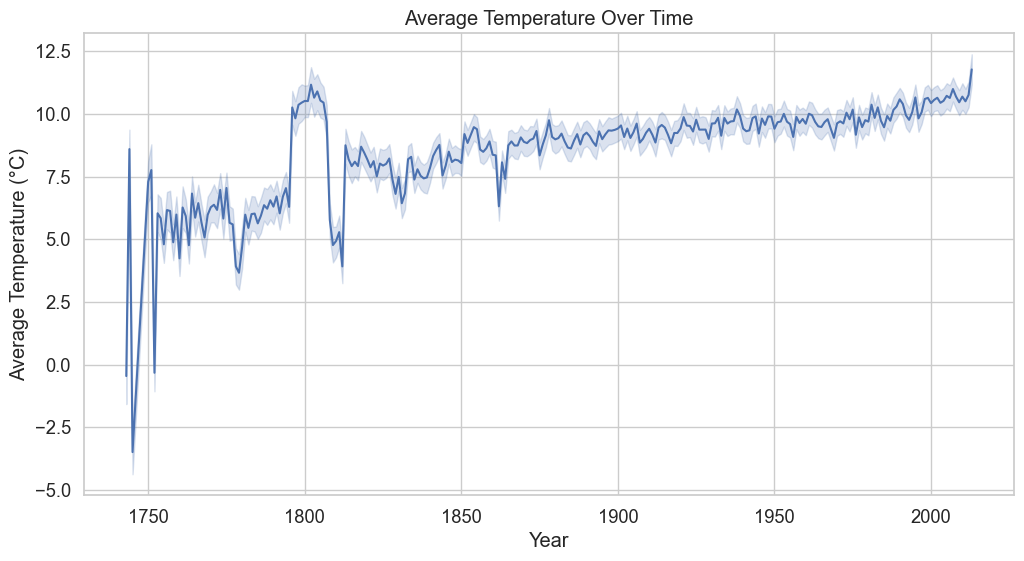

In [83]:
# Time Series Plot for Average Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='AverageTemperature', data=df)
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_8964\2859115415.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=20)


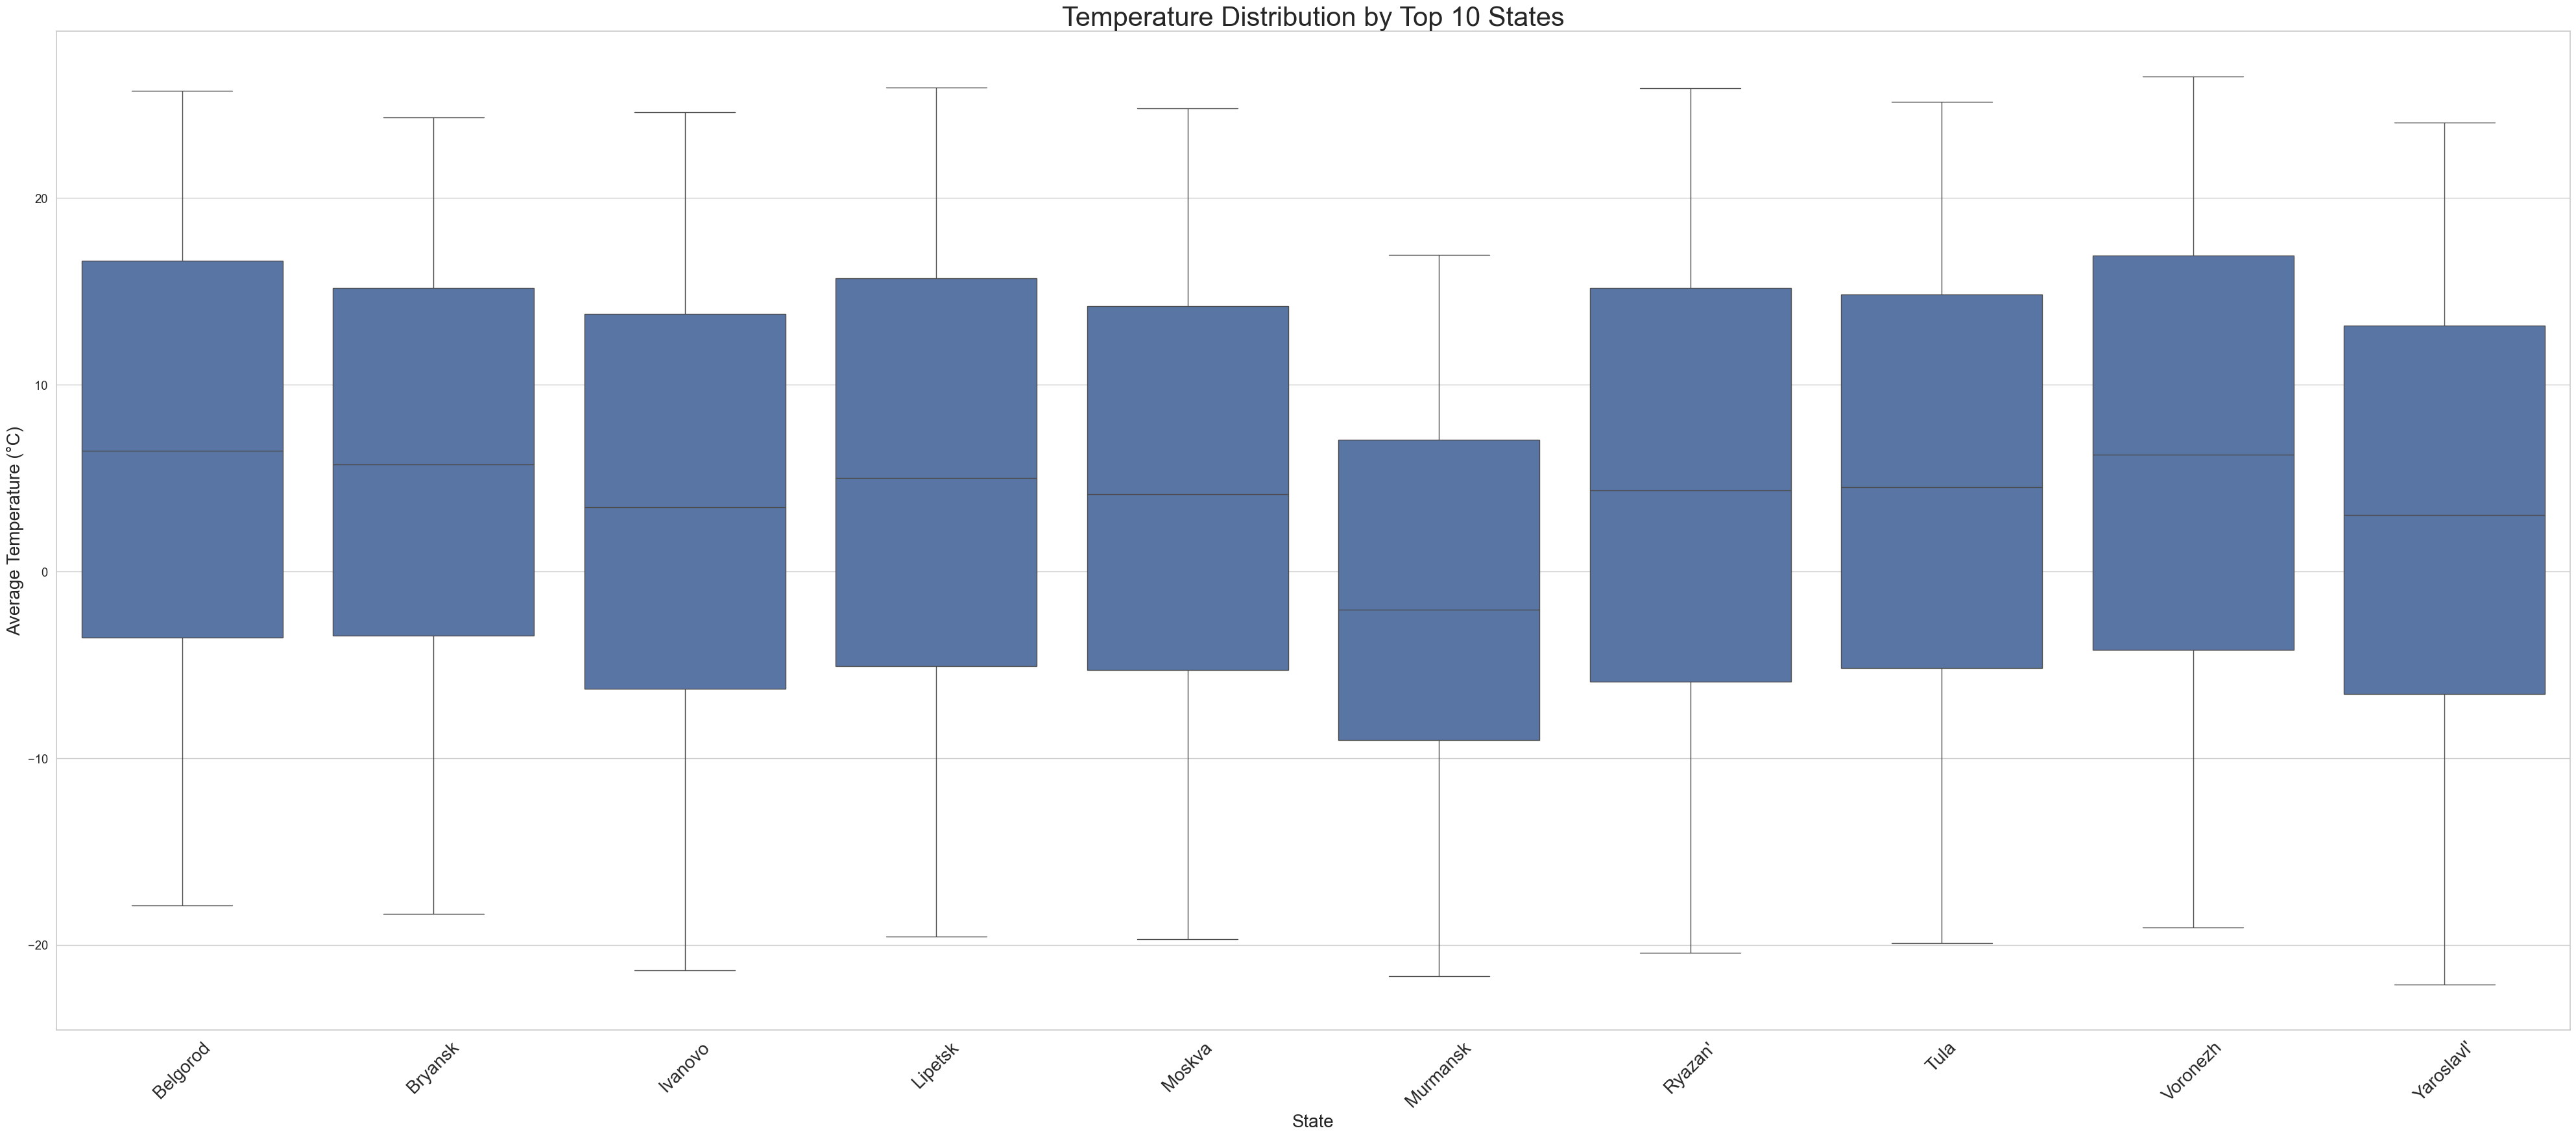

In [84]:
#  Distribution of Temperature by Top 10 States
top_countries = df['State'].value_counts()[:10].index.tolist()
plt.figure(figsize=(50, 20))
ax = sns.boxplot(x='State', y='AverageTemperature', data=df[df['State'].isin(top_countries)])
ax.set_title('Temperature Distribution by Top 10 States', fontsize=30)
ax.set_xlabel('State', fontsize=20)
ax.set_ylabel('Average Temperature (°C)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=20)

plt.show()


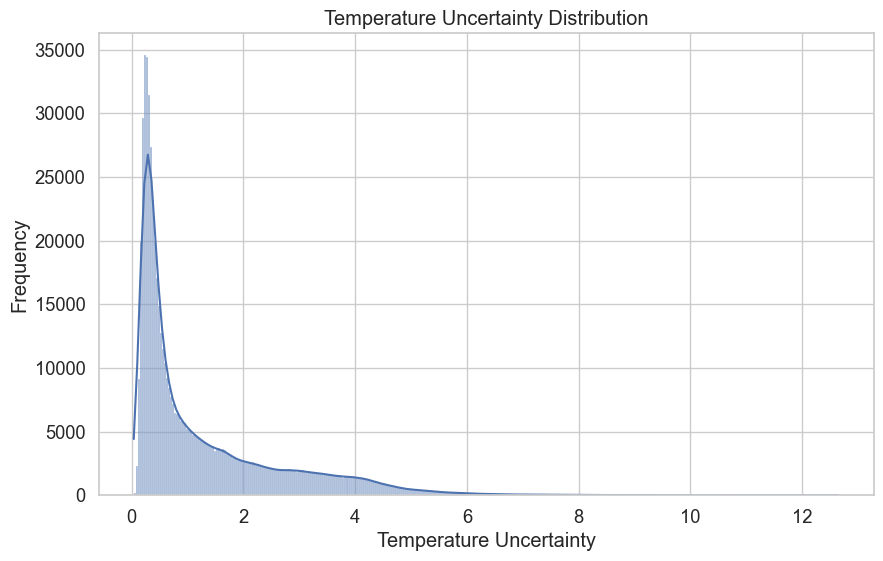

In [85]:
#  Temperature Uncertainty Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperatureUncertainty'].dropna(), kde=True)
plt.title('Temperature Uncertainty Distribution')
plt.xlabel('Temperature Uncertainty')
plt.ylabel('Frequency')
plt.show()

In [86]:
df

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Month,Day,Weekday,Year
0,25.544,1.171,Acre,Brazil,5,1,1,1855
1,24.228,1.103,Acre,Brazil,6,1,4,1855
2,24.371,1.044,Acre,Brazil,7,1,6,1855
3,25.427,1.073,Acre,Brazil,8,1,2,1855
4,25.675,1.014,Acre,Brazil,9,1,5,1855
...,...,...,...,...,...,...,...,...
620022,15.710,0.461,Zhejiang,China,4,1,0,2013
620023,21.634,0.578,Zhejiang,China,5,1,2,2013
620024,24.679,0.596,Zhejiang,China,6,1,5,2013
620025,29.272,1.340,Zhejiang,China,7,1,0,2013


In [87]:
df.to_csv('Cleaned_GlobalLandTemperaturesByState.csv', index=False)


# Cleaned Temperture By State

In [88]:
df = pd.read_csv('GlobalTemperatures.csv')
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [89]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [91]:
df.isna().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [92]:
#In order to work with date and time we need to convert the string date time to standard format provided by pandas
df['dt']=pd.to_datetime(df['dt'])
#extracting info for visualizations (e.g. temp vs year)
df['Month'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day
df['Weekday'] = df['dt'].dt.weekday  # Monday is 0 and Sunday is 6
df['Year'] = df['dt'].dt.year
df=df.drop(['dt'],axis=1)

In [93]:
df.sample(10, random_state=10)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month,Day,Weekday,Year
924,3.593,2.328,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,1827
1284,1.821,0.924,6.642,4.164,-5.407,3.498,12.972,0.300,1,1,3,1857
2126,4.668,0.223,10.565,0.232,-1.495,0.310,14.084,0.121,3,1,1,1927
1161,8.229,0.876,NaN,NaN,NaN,NaN,NaN,NaN,10,1,3,1846
1365,8.235,0.521,13.944,1.375,3.282,0.791,14.978,0.278,10,1,3,1863
2828,11.980,0.080,17.634,0.138,6.482,0.135,16.357,0.054,9,1,6,1985
2157,9.460,0.195,15.217,0.182,3.686,0.226,15.248,0.113,10,1,1,1929
1470,14.285,0.478,19.705,1.105,7.884,1.045,16.843,0.205,7,1,0,1872
326,5.572,2.307,NaN,NaN,NaN,NaN,NaN,NaN,3,1,5,1777
410,3.919,3.258,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0,1784


In [94]:
# Calculate the percentage of null values for the specified columns
selected_columns = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty','LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty']
null_percentage = df[selected_columns].isnull().mean() * 100
print("Percentage of Null Values:")
print(null_percentage)

Percentage of Null Values:
LandAverageTemperature                        0.375940
LandAverageTemperatureUncertainty             0.375940
LandMaxTemperature                           37.593985
LandMaxTemperatureUncertainty                37.593985
LandMinTemperature                           37.593985
LandMinTemperatureUncertainty                37.593985
LandAndOceanAverageTemperature               37.593985
LandAndOceanAverageTemperatureUncertainty    37.593985
dtype: float64


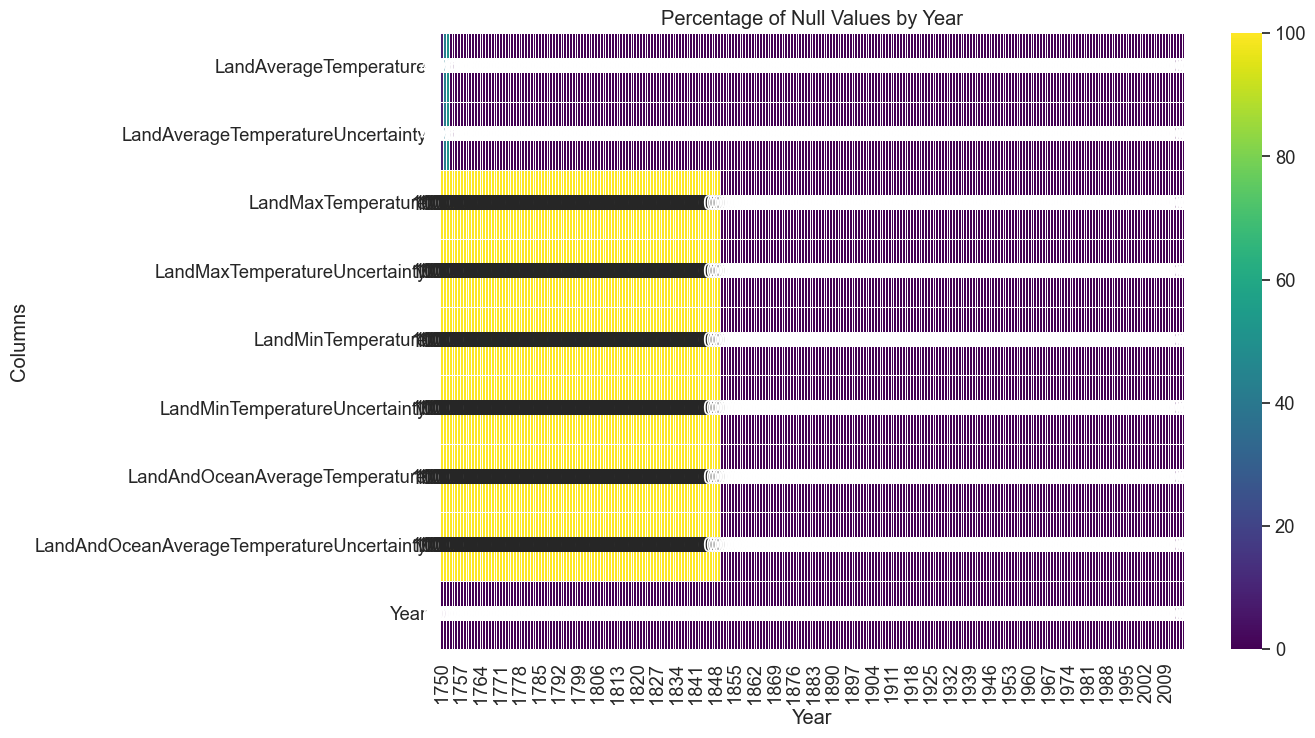

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df
columns_of_interest = [
    'LandAverageTemperature',
    'LandAverageTemperatureUncertainty',
    'LandMaxTemperature',
    'LandMaxTemperatureUncertainty',
    'LandMinTemperature',
    'LandMinTemperatureUncertainty',
    'LandAndOceanAverageTemperature',
    'LandAndOceanAverageTemperatureUncertainty'
]

# Subset the dataframe with the selected columns
subset_df = df[columns_of_interest + ['Year']]

# Calculate the percentage of null values by year
null_percentage_by_year = subset_df.groupby('Year').apply(lambda x: x.isnull().mean() * 100)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(null_percentage_by_year.T, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Percentage of Null Values by Year')
plt.xlabel('Year')
plt.ylabel('Columns')
plt.show()


In [96]:
# Extract years with null values
years_with_nulls = df[df[columns_of_interest].isnull().any(axis=1)]['Year'].unique()

# Drop rows for years with null values
df = df[~df['Year'].isin(years_with_nulls)]
df = df.reset_index(drop=True)
# Print a brief explanation
print(f"Dropped rows for the following years due to null values: {years_with_nulls}")

# Now df_cleaned contains the data without the rows for years with null values


Dropped rows for the following years due to null values: [1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763
 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777
 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791
 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805
 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819
 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833
 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847
 1848 1849]


**Reasoning:**
I have droped data for all above years for which there are null values

**Preserving Data Quality:** Rows with missing values may introduce noise and inaccuracies in analysis or modeling. By removing these rows, you ensure the quality of the data used for your analysis.

**Maintaining Consistency:** If null values are prevalent for certain years, removing those years ensures that the dataset is consistent and does not have missing values that could affect the integrity of the analysis.

**Facilitating Analysis:** When conducting time-series analysis or modeling, having continuous and complete data allows for more robust and accurate results. Dropping years with null values can help achieve this.

In [97]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month,Day,Weekday,Year
0,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1,1,1,1850
1,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,2,1,4,1850
2,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,3,1,4,1850
3,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,4,1,0,1850
4,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,5,1,2,1850
...,...,...,...,...,...,...,...,...,...,...,...,...
1987,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,8,1,5,2015
1988,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,9,1,1,2015
1989,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,10,1,3,2015
1990,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,11,1,6,2015


In [98]:
df.isna().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
Month                                        0
Day                                          0
Weekday                                      0
Year                                         0
dtype: int64

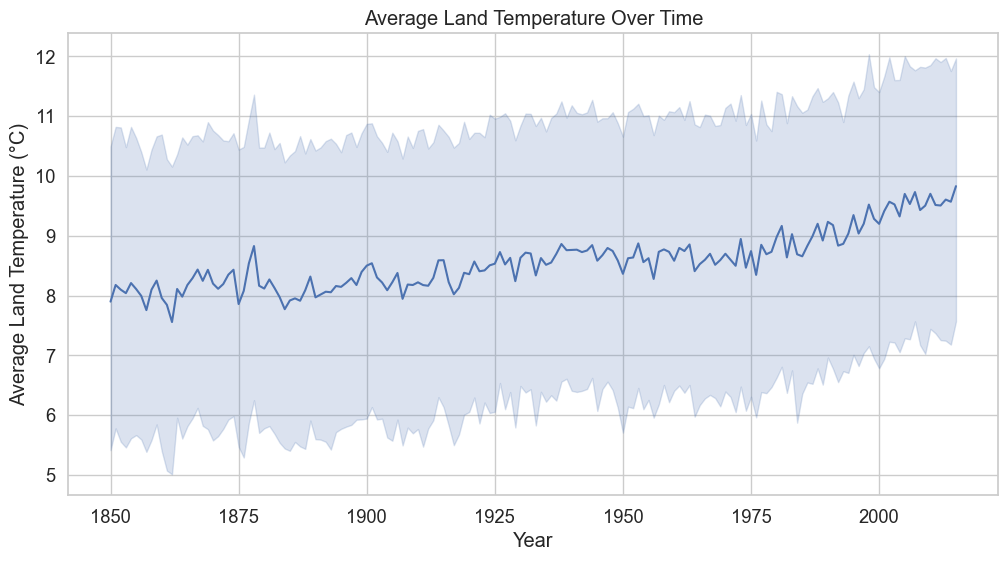

In [99]:
# Time Series Plot for Average Temperature
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='LandAverageTemperature', data=df)
plt.title('Average Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature (°C)')
plt.show()

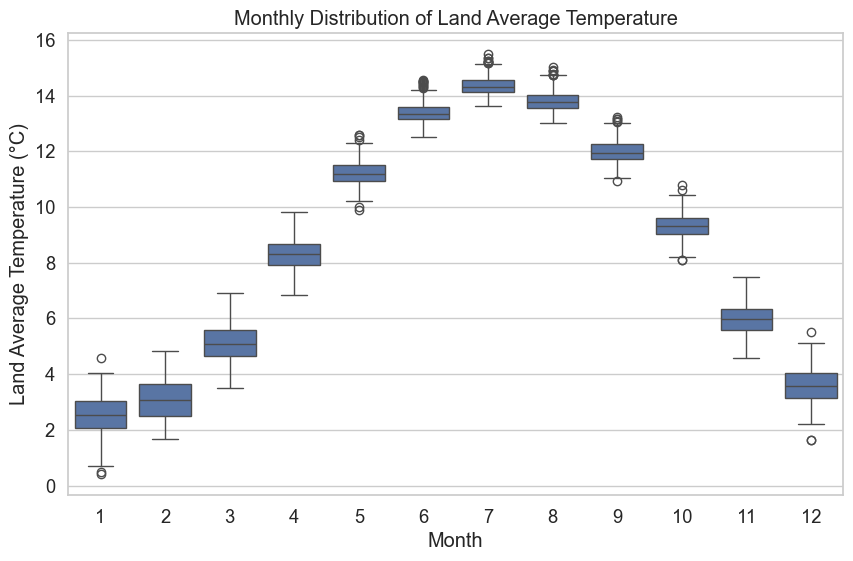

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='LandAverageTemperature', data=df)
plt.title('Monthly Distribution of Land Average Temperature')
plt.xlabel('Month')
plt.ylabel('Land Average Temperature (°C)')
plt.show()

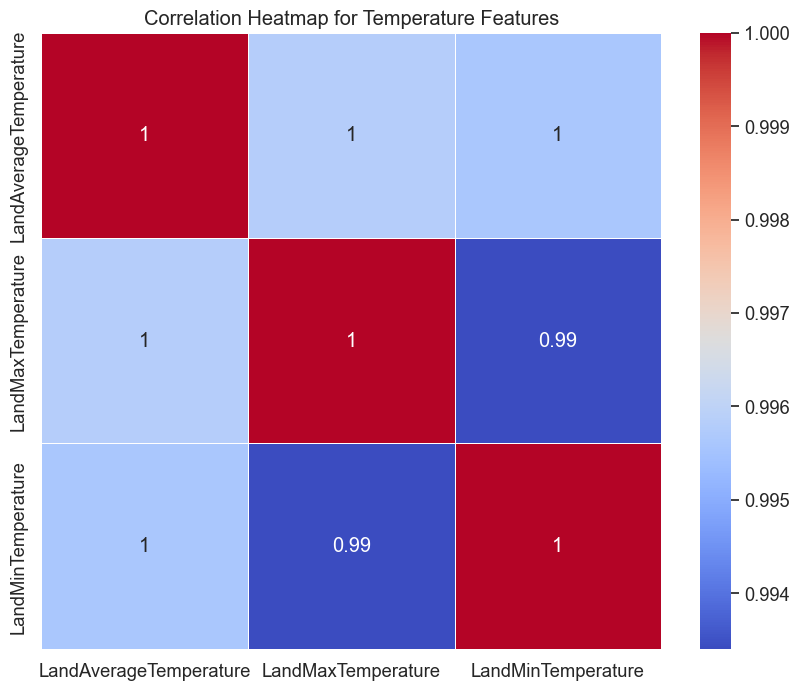

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Temperature Features')
plt.show()

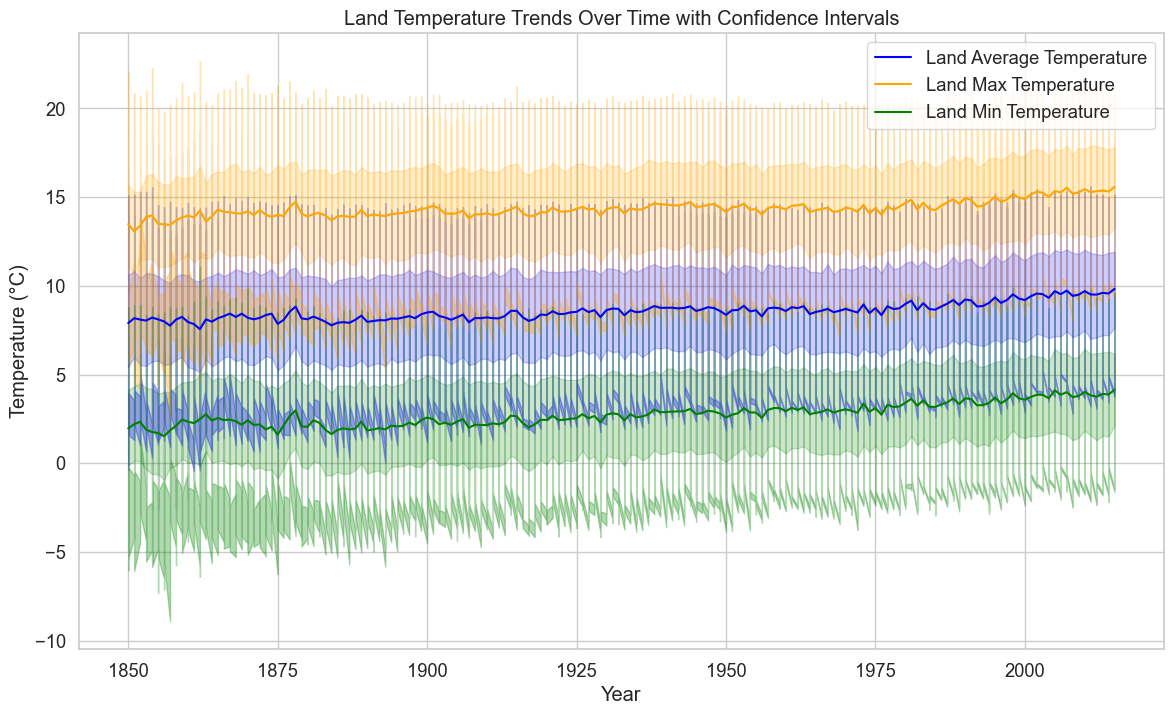

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df
plt.figure(figsize=(14, 8))

# Plotting the time series line with shaded confidence interval
sns.lineplot(x='Year', y='LandAverageTemperature', data=df, label='Land Average Temperature', color='blue')
sns.lineplot(x='Year', y='LandMaxTemperature', data=df, label='Land Max Temperature', color='orange')
sns.lineplot(x='Year', y='LandMinTemperature', data=df, label='Land Min Temperature', color='green')

# Shading the confidence interval
plt.fill_between(df['Year'], df['LandAverageTemperature'] - df['LandAverageTemperatureUncertainty'],
                 df['LandAverageTemperature'] + df['LandAverageTemperatureUncertainty'], alpha=0.3, color='blue')
plt.fill_between(df['Year'], df['LandMaxTemperature'] - df['LandMaxTemperatureUncertainty'],
                 df['LandMaxTemperature'] + df['LandMaxTemperatureUncertainty'], alpha=0.3, color='orange')
plt.fill_between(df['Year'], df['LandMinTemperature'] - df['LandMinTemperatureUncertainty'],
                 df['LandMinTemperature'] + df['LandMinTemperatureUncertainty'], alpha=0.3, color='green')

# Adding labels and title
plt.title('Land Temperature Trends Over Time with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()



In [103]:
df.to_csv('CleanedGlobalTemperatures.csv', index=False)